In [1]:
import pandas as pd
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

<AxesSubplot:>

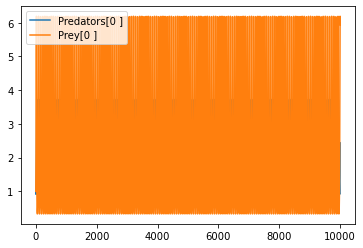

In [2]:
#This is for the simple test model
df = pd.read_csv('results.dat', sep='\t')
df = df[['Predators[0 ]', 'Prey[0 ]']]
df.plot()

In [3]:
prey_birth = 0.2
nomnom     = 0.1
pred_birth = 0.025
pred_death = 0.05

def ode_fun(t, y) :
    return [
        prey_birth*y[0] - nomnom*y[0]*y[1],
        pred_birth*y[0]*y[1] - pred_death*y[1]
    ]

n = len(df)
y0 = [1, 1]

In [6]:
%%time
sol = solve_ivp(ode_fun, [0, n-1], y0, t_eval=range(n), method='Radau')

Wall time: 1.24 s


rmse err: 0.680209


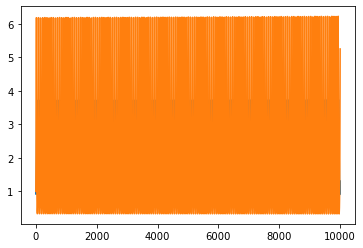

In [7]:
plt.plot(sol.t, sol.y[1,:], sol.t, sol.y[0,:])

print('rmse err: %f' % (np.sqrt(np.mean(np.square(sol.y[1,:]-df['Predators[0 ]'])) + np.mean(np.square(sol.y[0,:]-df['Prey[0 ]'])))))
